Voici un complément un utile sur l'étude des erreurs.

In [1]:
"""On importe les bibliothèques scientifiques car elles seront utilisées ensuite"""
import numpy as np
import matplotlib.pyplot as plt


(erreurs)=
# Comprendre ses erreurs

Quand on écrit du code, on fait des erreurs. Ca arrive à tout le monde. Il y a deux types d'erreurs :
* Les erreurs qui empêchent le code de s'exécuter correctement : Python renvoie alors un message d'erreur.
* Les erreurs qui n'empêchent pas le code de s'exécuter mais qui font que le programme ne renvoie pas ce qui est attendu.

## Python et les messages d'erreurs.

### Exemple basique

Lorsqu'un script bute sur un erreur d'exécution. Python affiche un message :

In [2]:
L1 = np.array([1, 2, 3])
L2 = np.array([1, 2])

L3 = L1 + L2

a = 3 * 4

print(L3)


ValueError: operands could not be broadcast together with shapes (3,) (2,) 

Pour comprendre et corriger son erreur, deux points sont importants :
* L'endroit où l'erreur a été commise : ici `----> 6 L3 = L1 + L2`. C'est à la ligne 6.
* Le message d'erreur : `ValueError: operands could not be broadcast together with shapes (3,) (2,) `. Avec un peu de connaissance en anglais, on comprend que les deux vecteurs numpy n'ont pas la même taille (shape) et qu'on ne peut donc pas les sommer.

Dans la majorité des cas, ces deux éléments vont permettront de comprendre votre erreur.

### Le cas d'erreur dans une fonction
Il arrive que certaines erreurs se trouvent dans une fonction. Le message d'erreur est alors un peu plus compliqué :

In [3]:
def x_carre(x):
  return x ** 2

a = "r"

b = x_carre(a)

print(b)


TypeError: unsupported operand type(s) for ** or pow(): 'str' and 'int'

Ici, Python signale deux endroits où il y a une erreur. L'explication est simple : ici le message est assez clair, l'opérateur puissance (`**`) ne peut s'appliquer entre une chaine de caractère `str` et un entier `int` (logique !!). Sauf que cette erreur se produit dans une fonction (`x_carre`). Python signale alors :
* l'endroit où la fonction a été appelée `b = x_carre(a)`
* l'endroit _dans la fonction_ à l'erreur a été déclenchée (`return x ** 2`)

A vous de savoir si le problème est la définition de la fonction ou la manière de l'appeler. Ici c'est vraisemblablement la manière de l'appeler car on ne devrait pas chercher à calculer le carré d'une chaine de caractère !

Ce système est très efficace mais peut dérouter, surtout quand on utilise des fonctions déjà existantes qui sont souvent imbriquées. Un exemple ci-dessous.

ValueError: x and y must have same first dimension, but have shapes (3,) and (2,)

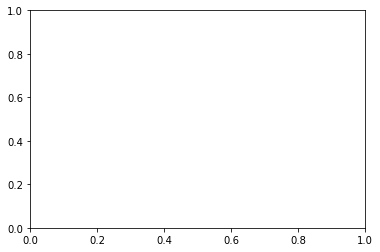

In [4]:
L1 = np.array([1, 2, 3])
L2 = np.array([1, 2])

f, ax = plt.subplots()
ax.plot(L1, L2)


Pour corriger son erreur, il faut :
* garder son calme !
* chercher le message d'erreur (ici `ValueError: x and y must have same first dimension, but have shapes (3,) and (2,)`)
* chercher la partie du message d'erreur qui point vers __votre code__ (on peut raisonnablement penser qu'il n'y a pas d'erreurs dans les fonctions des bibliothèques officielles). Ici `ax.plot(L1, L2)` : `L1` et `L2` n'ont pas la même taille, c'est là le problème.

### Les parenthèses...
Lorsqu'on écrit une formule un peu trop grosse, il arrive qu'on oublie de fermer une parenthèse.

In [5]:
u1 = 1
u2 = 0.1
v1 = 15
v2 = 14
a = v1 / v2
ua = a * np.sqrt((u1 / v1) ** 2 + (u2 / v2) ** 2



print(ua)


SyntaxError: invalid syntax (<ipython-input-5-8048891cc3a0>, line 10)

Problèmes :
* le message est peu verbeux (syntaxe invalide)
* la ligne pointé par le message n'est pas la ligne où il y a une erreur !

En effet, Python  ne se rend compte du problème de parenthèse mal fermée que lorsqu'il arrive sur une nouvelle instruction. C'est pourquoi, __en cas d'erreur de syntaxe invalide, pensez aussi à vérifier l'écriture des lignes _au dessus_ de l'endroit signalé par le message d'erreur.__

## Pas d'erreur mais...
```{attention}
Ce n'est pas parce que l'interpréteur Python ne renvoie pas une erreur que votre programme est bon. Il peut faire des calculs et renvoyer des valeurs __qui ne sont pas celles recherchées.__
```

```{tip} 
__Prenez l'habitude de tester votre code sur des cas simples où vous connaissez les valeurs de retours attendues pour vérifier que votre programme fait bien ce qui est demandé (éviter les cas particuliers).__
```